<a href="https://colab.research.google.com/github/shihanxie/Econ475/blob/main/UnitRoots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

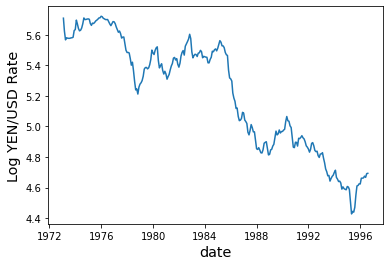

In [ ]:
usdyen = pd.read_csv('https://raw.githubusercontent.com/shihanxie/Econ475/main/data/USDYEN.csv')
usdyen.index = pd.date_range(start='1973-01-01', periods= usdyen.shape[0], freq='M')
# Compute log(usdyen)
usdyen['logusdyen'] = np.log(usdyen['USDYEN'])

# Define the start and end date of the sample we use for estimation
start = '1973-01-01'
end = '1995-01-01'

plt.plot(usdyen['logusdyen'])
ax = plt.gca()
ax.set_ylabel('Log YEN/USD Rate', fontsize = 'x-large')
ax.set_xlabel('date', fontsize = 'x-large')
plt.show()

### Differencing the exchange rate
Growth rate of $y \approx \Delta ln(y_t) = ln(y_t) - ln(y_{t-1})$

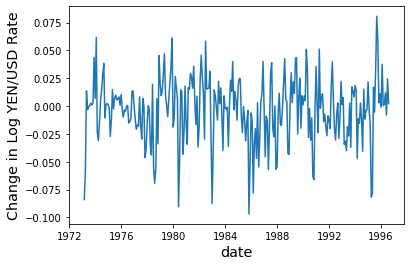

In [ ]:
# Take the first difference of log(usdyen)
usdyen['d1usdyen'] = usdyen['logusdyen'].diff()

plt.plot(usdyen['d1usdyen'])
ax = plt.gca()
ax.set_ylabel('Change in Log YEN/USD Rate', fontsize = 'x-large')
ax.set_xlabel('date', fontsize = 'x-large')
plt.show()

###Checking the correlogram

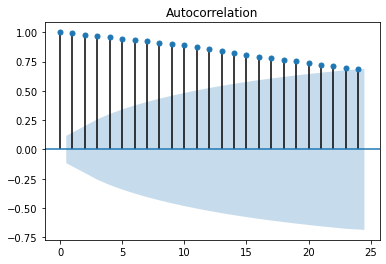

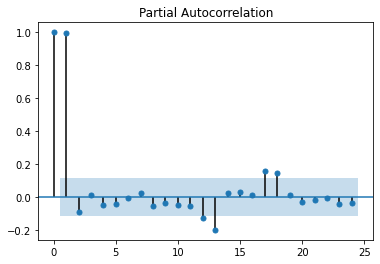

In [ ]:
plot_acf(usdyen['logusdyen'], lags = 24)
plot_pacf(usdyen['logusdyen'], lags = 24)
plt.show()

### AR(2) model with linear trend

In [ ]:
usdyen['time'] = np.arange(usdyen.shape[0])+1
X = usdyen[['time']][start:end]
Y = usdyen['logusdyen'][start:end]
result_ar2 = ARIMA(Y, order=(2,0,0), exog=X).fit()
print(result_ar2.summary())

                               SARIMAX Results                                
Dep. Variable:              logusdyen   No. Observations:                  264
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 589.723
Date:                Fri, 02 Apr 2021   AIC                          -1169.446
Time:                        02:13:15   BIC                          -1151.566
Sample:                    01-31-1973   HQIC                         -1162.261
                         - 12-31-1994                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8021      0.117     49.690      0.000       5.573       6.031
time          -0.0042      0.001     -5.909      0.000      -0.006      -0.003
ar.L1          1.3175      0.060     22.085      0.0

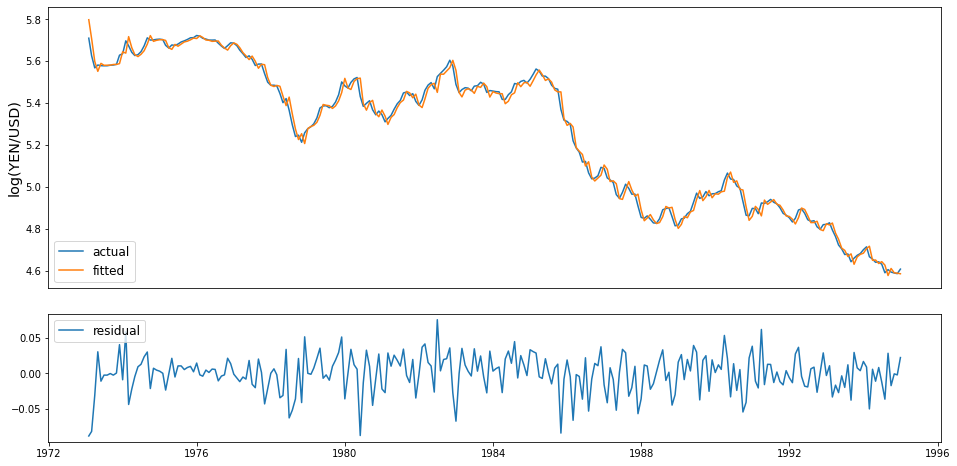

In [ ]:
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2])
ax2 = fig.add_subplot(gs[2], sharex=ax1)

ax1.plot(Y, label = 'actual')
ax1.plot(result_ar2.fittedvalues, label = 'fitted')

ax2.plot(result_ar2.resid, '-',label='residual')

ax1.tick_params(bottom=False, labelbottom=False, left=True, labelleft=True)
ax1.set_ylabel('log(YEN/USD)', fontsize = 'x-large')

ax1.legend(loc='lower left', fontsize = 'large')
ax2.legend(loc='upper left', fontsize = 'large')
plt.show()

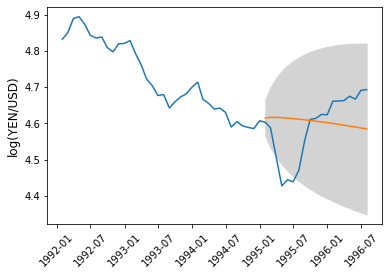

In [ ]:
# Define the start and end(exclusive) date of our forecasting period
forecast_start = '1995-01-01'
forecast_end = '1996-08-01'

# Assign values to the exogenous regressors for our forecasting period
X_exog = usdyen[['time']][forecast_start:forecast_end]
forecast = result_ar2.get_forecast(19, exog = X_exog)
mean_forecast = forecast.predicted_mean
confidence_interval = forecast.conf_int()

plt.plot(usdyen['logusdyen']['1992-01-01':])
plt.plot(usdyen.index[-19:], mean_forecast.values)
ax = plt.gca()
ax.tick_params(axis = 'x', rotation = 45)
ax.set_ylabel('log(YEN/USD)', fontsize = 'large')

# Shade confidence interval
plt.fill_between(usdyen.index[-19:], confidence_interval['lower logusdyen'], confidence_interval['upper logusdyen'], color='lightgrey')
plt.show()

###Dicky-Fuller unit root test
Null hypothesis: the series has a unit root

In [ ]:
dftest = statsmodels.tsa.stattools.adfuller(usdyen['logusdyen'], regression='ct')
print('Dicky-Fuller test statistic is', dftest[0])
print('Dicky-Fuller test p-value is', dftest[1])
print('Number of lags used is', dftest[2])

Dicky-Fuller test statistic is -2.74016738997854
Dicky-Fuller test p-value is 0.2197859824235205
Number of lags used is 3


### AR(1) model for the first difference of log(YEN/USD)

In [ ]:
d1Y = usdyen['d1usdyen'][start:end]
result_d1ar1 = ARIMA(d1Y, order=(1,0,0)).fit()
print(result_d1ar1.summary())

                               SARIMAX Results                                
Dep. Variable:               d1usdyen   No. Observations:                  264
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 586.044
Date:                Fri, 02 Apr 2021   AIC                          -1166.088
Time:                        02:25:34   BIC                          -1155.361
Sample:                    01-31-1973   HQIC                         -1161.778
                         - 12-31-1994                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0043      0.002     -1.731      0.084      -0.009       0.001
ar.L1          0.3312      0.061      5.413      0.000       0.211       0.451
sigma2         0.0007   5.15e-05     13.171      0.0

In [ ]:
result_arima = ARIMA(Y, order=(1,1,0), exog = X).fit()
print(result_arima.summary())

                               SARIMAX Results                                
Dep. Variable:              logusdyen   No. Observations:                  264
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 586.044
Date:                Fri, 02 Apr 2021   AIC                          -1166.088
Time:                        02:35:03   BIC                          -1155.372
Sample:                    01-31-1973   HQIC                         -1161.782
                         - 12-31-1994                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
time          -0.0043      0.002     -1.732      0.083      -0.009       0.001
ar.L1          0.3313      0.061      5.414      0.000       0.211       0.451
sigma2         0.0007   5.15e-05     13.169      0.0

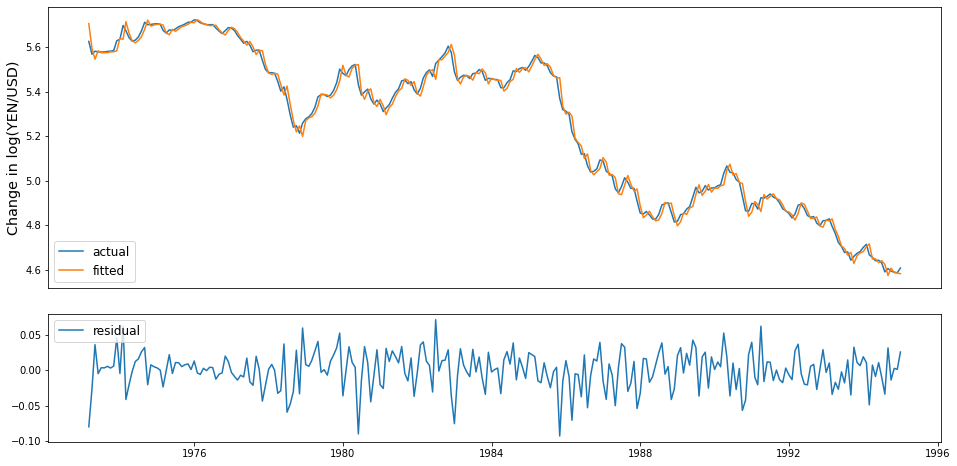

In [ ]:
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2])
ax2 = fig.add_subplot(gs[2], sharex=ax1)

ax1.plot(Y[1:], label = 'actual')
ax1.plot(result_arima.fittedvalues[1:], label = 'fitted')

ax2.plot(result_arima.resid[1:], '-',label='residual')

ax1.tick_params(bottom=False, labelbottom=False, left=True, labelleft=True)
ax1.set_ylabel('Change in log(YEN/USD)', fontsize = 'x-large')

ax1.legend(loc='lower left', fontsize = 'large')
ax2.legend(loc='upper left', fontsize = 'large')
plt.show()

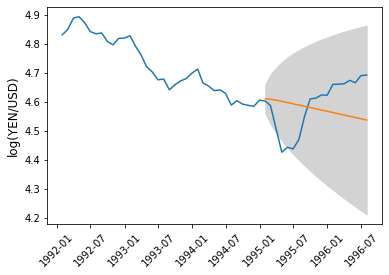

In [ ]:
# Define the start and end(exclusive) date of our forecasting period
forecast_start = '1995-01-01'
forecast_end = '1996-08-01'

# Assign values to the exogenous regressors for our forecasting period
X_exog = usdyen[['time']][forecast_start:forecast_end]
forecast = result_arima.get_forecast(19, exog = X_exog)
mean_forecast = forecast.predicted_mean
confidence_interval = forecast.conf_int()

plt.plot(usdyen['logusdyen']['1992-01-01':])
plt.plot(usdyen.index[-19:], mean_forecast.values)
ax = plt.gca()
ax.tick_params(axis = 'x', rotation = 45)
ax.set_ylabel('log(YEN/USD)', fontsize = 'large')

# Shade confidence interval
plt.fill_between(usdyen.index[-19:], confidence_interval['lower logusdyen'], confidence_interval['upper logusdyen'], color='lightgrey')
plt.show()